In [48]:
import torch 
import torch.optim
import torch.nn as nn
import matplotlib.pyplot as pl
torch.manual_seed(0)
torch.cuda.manual_seed(0)

In [49]:
class latent(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_hidden = nn.Linear(9, 2)
        self.hidden_out = nn.Linear(2, 9)
    def forward(self, x):
        x = self.input_hidden(x)
        x = self.hidden_out(x)
        return x

In [50]:
model = latent()

In [51]:
model

latent(
  (input_hidden): Linear(in_features=9, out_features=2, bias=True)
  (hidden_out): Linear(in_features=2, out_features=9, bias=True)
)

In [52]:
sentences = [
    ["dog", "puppy", "bark"],       
    ["eagle", "sparrow", "soar"],   
    ["fish", "shark", "swim"],
    ["dog", "puppy", "bark"],       
    ["eagle", "sparrow", "soar"],   
    ["fish", "shark", "swim"],
    ["dog", "puppy", "bark"],       
    ["eagle", "sparrow", "soar"],   
    ["fish", "shark", "swim"],
    ["dog", "puppy", "bark"],       
    ["eagle", "sparrow", "soar"],   
    ["fish", "shark", "swim"],
    ["dog", "puppy", "bark"],       
    ["eagle", "sparrow", "soar"],   
    ["fish", "shark", "swim"],
    ["dog", "puppy", "bark"],       
    ["eagle", "sparrow", "soar"],   
    ["fish", "shark", "swim"],
    ["dog", "puppy", "bark"],       
    ["eagle", "sparrow", "soar"],   
    ["fish", "shark", "swim"],
    ["dog", "puppy", "bark"],       
    ["eagle", "sparrow", "soar"],   
    ["fish", "shark", "swim"],
    ["dog", "puppy", "bark"],       
    ["eagle", "sparrow", "soar"],   
    ["fish", "shark", "swim"],
]


In [53]:
bigrams = []
for words_list in sentences:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])
            

print(bigrams)

[['dog', 'puppy'], ['puppy', 'dog'], ['dog', 'bark'], ['bark', 'dog'], ['puppy', 'bark'], ['bark', 'puppy'], ['eagle', 'sparrow'], ['sparrow', 'eagle'], ['eagle', 'soar'], ['soar', 'eagle'], ['sparrow', 'soar'], ['soar', 'sparrow'], ['fish', 'shark'], ['shark', 'fish'], ['fish', 'swim'], ['swim', 'fish'], ['shark', 'swim'], ['swim', 'shark'], ['dog', 'puppy'], ['puppy', 'dog'], ['dog', 'bark'], ['bark', 'dog'], ['puppy', 'bark'], ['bark', 'puppy'], ['eagle', 'sparrow'], ['sparrow', 'eagle'], ['eagle', 'soar'], ['soar', 'eagle'], ['sparrow', 'soar'], ['soar', 'sparrow'], ['fish', 'shark'], ['shark', 'fish'], ['fish', 'swim'], ['swim', 'fish'], ['shark', 'swim'], ['swim', 'shark'], ['dog', 'puppy'], ['puppy', 'dog'], ['dog', 'bark'], ['bark', 'dog'], ['puppy', 'bark'], ['bark', 'puppy'], ['eagle', 'sparrow'], ['sparrow', 'eagle'], ['eagle', 'soar'], ['soar', 'eagle'], ['sparrow', 'soar'], ['soar', 'sparrow'], ['fish', 'shark'], ['shark', 'fish'], ['fish', 'swim'], ['swim', 'fish'], ['sha

In [54]:
total_words = []
for words_list in sentences:
    for words in words_list:
        if words not in total_words:
            total_words.append(words)

print(total_words)
print("The total content is: ")
print(len(total_words))

['dog', 'puppy', 'bark', 'eagle', 'sparrow', 'soar', 'fish', 'shark', 'swim']
The total content is: 
9


In [55]:
words_dict = {}

counter = 0
for word in total_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)



{'dog': 0, 'puppy': 1, 'bark': 2, 'eagle': 3, 'sparrow': 4, 'soar': 5, 'fish': 6, 'shark': 7, 'swim': 8}


In [56]:
import numpy as np

onehot_data = np.zeros((len(total_words), len(total_words)))

for i in range(len(total_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in total_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])

dog : [1. 0. 0. 0. 0. 0. 0. 0. 0.]
puppy : [0. 1. 0. 0. 0. 0. 0. 0. 0.]
bark : [0. 0. 1. 0. 0. 0. 0. 0. 0.]
eagle : [0. 0. 0. 1. 0. 0. 0. 0. 0.]
sparrow : [0. 0. 0. 0. 1. 0. 0. 0. 0.]
soar : [0. 0. 0. 0. 0. 1. 0. 0. 0.]
fish : [0. 0. 0. 0. 0. 0. 1. 0. 0.]
shark : [0. 0. 0. 0. 0. 0. 0. 1. 0.]
swim : [0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [57]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
    
X = np.array(X)
Y = np.array(Y)

In [62]:
for epoch in range(30000):
    inputs = torch.tensor(X).float().to("cuda")
    labels = torch.tensor(Y).float().to("cuda")
    model = model.to("cuda")
    
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    loss = criterion(outputs, labels)
    
    loss.backward()
    
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

Epoch [1000/1000], Loss: 0.0836
Epoch [2000/1000], Loss: 0.0830
Epoch [3000/1000], Loss: 0.0824
Epoch [4000/1000], Loss: 0.0818
Epoch [5000/1000], Loss: 0.0813
Epoch [6000/1000], Loss: 0.0807
Epoch [7000/1000], Loss: 0.0802
Epoch [8000/1000], Loss: 0.0797
Epoch [9000/1000], Loss: 0.0792
Epoch [10000/1000], Loss: 0.0787
Epoch [11000/1000], Loss: 0.0783
Epoch [12000/1000], Loss: 0.0779
Epoch [13000/1000], Loss: 0.0775
Epoch [14000/1000], Loss: 0.0772
Epoch [15000/1000], Loss: 0.0768
Epoch [16000/1000], Loss: 0.0765
Epoch [17000/1000], Loss: 0.0763
Epoch [18000/1000], Loss: 0.0760
Epoch [19000/1000], Loss: 0.0758
Epoch [20000/1000], Loss: 0.0756
Epoch [21000/1000], Loss: 0.0754
Epoch [22000/1000], Loss: 0.0753
Epoch [23000/1000], Loss: 0.0751
Epoch [24000/1000], Loss: 0.0750
Epoch [25000/1000], Loss: 0.0749
Epoch [26000/1000], Loss: 0.0748
Epoch [27000/1000], Loss: 0.0747
Epoch [28000/1000], Loss: 0.0746
Epoch [29000/1000], Loss: 0.0746
Epoch [30000/1000], Loss: 0.0745


In [63]:
weights = model.state_dict()['hidden_out.weight']
word_embeddings = {}
for word in total_words:
    word_embeddings[word] = weights[words_dict[word]].to("cpu")
    

In [64]:
word_embeddings

{'dog': tensor([0.2839, 0.6622]),
 'puppy': tensor([0.2368, 0.6956]),
 'bark': tensor([0.2775, 0.5791]),
 'eagle': tensor([ 0.4479, -0.8183]),
 'sparrow': tensor([ 0.3104, -0.6181]),
 'soar': tensor([ 0.2675, -0.5029]),
 'fish': tensor([-0.6165, -0.0310]),
 'shark': tensor([-0.6089, -0.0885]),
 'swim': tensor([-0.6470,  0.1809])}

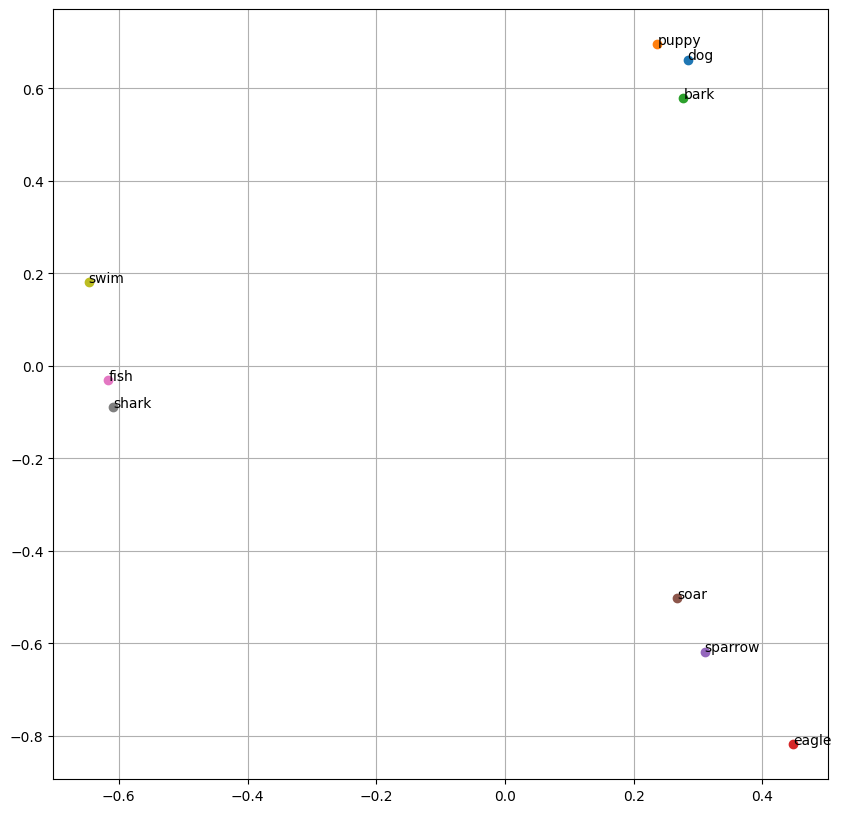

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
plt.grid(True)
plt.show()

In [15]:
lists = []
for i in range(-100, 100):
    for j in range(-100, 100):
        lists.append([i, j, 3*i+5*j])


(40000, 3)


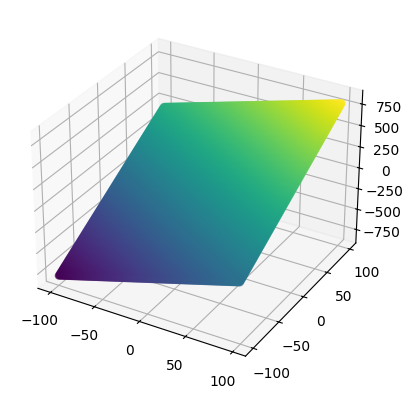

In [16]:
import matplotlib.pyplot as plt
import numpy as np
listn = np.array(lists)
print(listn.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")    
ax.scatter(listn[:, 0], listn[:, 1], listn[:, 2], alpha=0.5, cmap='viridis', c=listn[:, 2]);

C:\Users\praga\AppData\Local\Temp\ipykernel_14072\4230752516.py:8: RuntimeWarning: overflow encountered in exp
  z = 1 / (1 + np.exp(-(z)))   # apply sigmoid on z


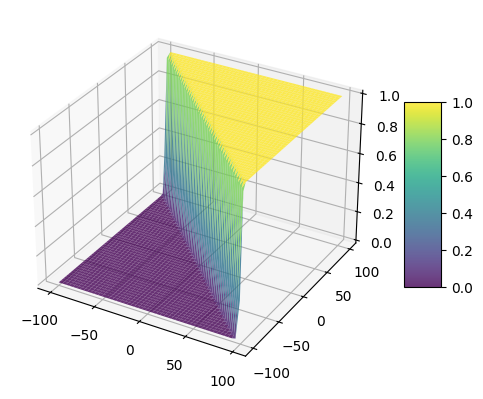

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
x = listn[:, 0]
y = listn[:, 1]
z = listn[:, 2]
z = 1 / (1 + np.exp(-(z)))    
X, Y = np.meshgrid(
    np.linspace(x.min(), x.max(), 50),
    np.linspace(y.min(), y.max(), 50)
)

# Define sigmoid plane as a function of X and Y
Z = 1 / (1 + np.exp(-(X + Y)))   # you can change (X+Y) → (aX+bY+c)

# Plot surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


C:\Users\praga\AppData\Local\Temp\ipykernel_14072\2730223025.py:6: RuntimeWarning: overflow encountered in exp
  z = 1 / (1 + np.exp(-(z)))


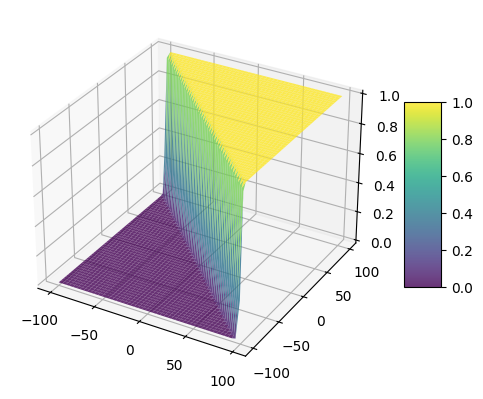

In [21]:
import matplotlib.pyplot as plt
import numpy as np 
x = listn[:, 0]
y = listn[:, 1]
z = listn[:, 2]
z = 1 / (1 + np.exp(-(z)))    
X, Y = np.meshgrid(
    np.linspace(x.min(), x.max(), 50),
    np.linspace(y.min(), y.max(), 50)
)

# Define sigmoid plane as a function of X and Y
Z = 1 / (1 + np.exp(-(X + Y)))   # you can change (X+Y) → (aX+bY+c)

# Plot surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


C:\Users\praga\AppData\Local\Temp\ipykernel_14072\1712940117.py:6: RuntimeWarning: overflow encountered in exp
  z = 1 / (1 + np.exp(-(z)))


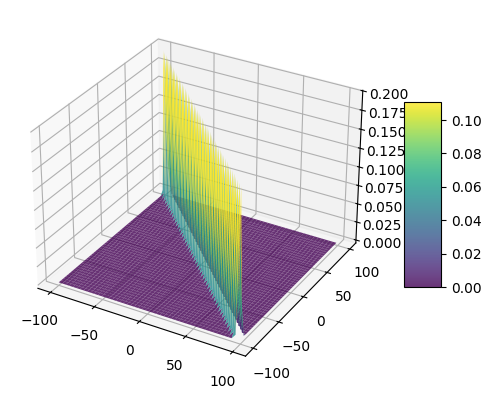

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
x = listn[:, 0]
y = listn[:, 1]
z = listn[:, 2]
z = 1 / (1 + np.exp(-(z)))    
X, Y = np.meshgrid(
    np.linspace(x.min(), x.max(), 50),
    np.linspace(y.min(), y.max(), 50)
) 
Z = (1 / (1 + np.exp(-(X + Y))))*(1 - (1 / (1 + np.exp(-(X + Y))) ))   
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


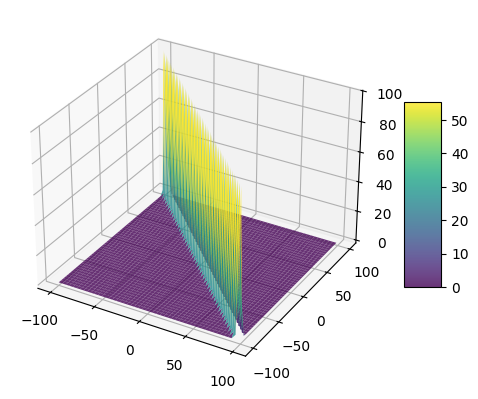

In [ ]:
Z = (1 / (1 + np.exp(-(X + Y))))*(1 - (1 / (1 + np.exp(-(X + Y))) ))   * 500 
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()